In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,ElasticNet,ElasticNetCV,LassoCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder

## 1. Data Collection

In [3]:
df = pd.read_csv('bigmart_train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
df.shape

(8523, 12)

In [7]:
df.size

102276

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [12]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
df.Item_Weight.mean()

12.857645184136183

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Columns Unique Value in all dataset

In [16]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [18]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [19]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [21]:
df.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [22]:
df.Item_Identifier.shape

(8523,)

In [23]:
df.Item_Identifier.size

8523

In [24]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [66]:
cols_to_drop = []

In [67]:
df2 = df.drop(cols_to_drop, axis=1)

In [68]:
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## 2. Filling Missing value Help of different techniques

In [69]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [70]:
df2['Outlet_Size'] = df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])

In [71]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [72]:
df2['Item_Weight'] = df2['Item_Weight'].fillna(df2['Item_Weight'].mean())

In [73]:
df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 3. Data Parameters Repairing

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [75]:
df2.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [76]:
df2.Item_Fat_Content = df2.Item_Fat_Content.replace(['low fat', 'LF'], 'Low Fat')

In [77]:
df2.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [78]:
df2.Item_Fat_Content = df2.Item_Fat_Content.replace(['reg'], 'Regular')

In [79]:
df2.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [80]:
df2.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [81]:
df2.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [82]:
df2.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [83]:
df2['Age'] = 2021 - df2.Outlet_Establishment_Year

In [84]:
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


## 4. Cleaning Data with help of IQR Concept

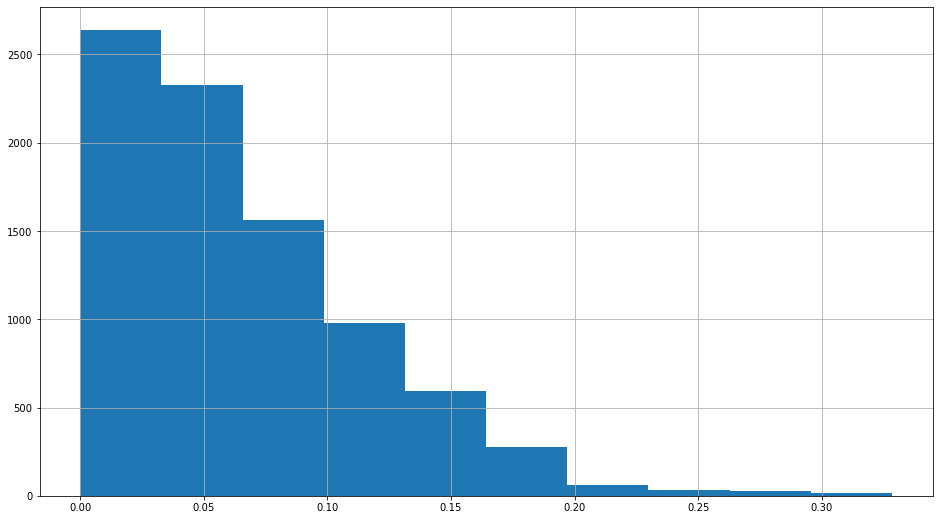

In [90]:
plt.figure(figsize=(16,9))
df2['Item_Visibility'].hist()
plt.show()

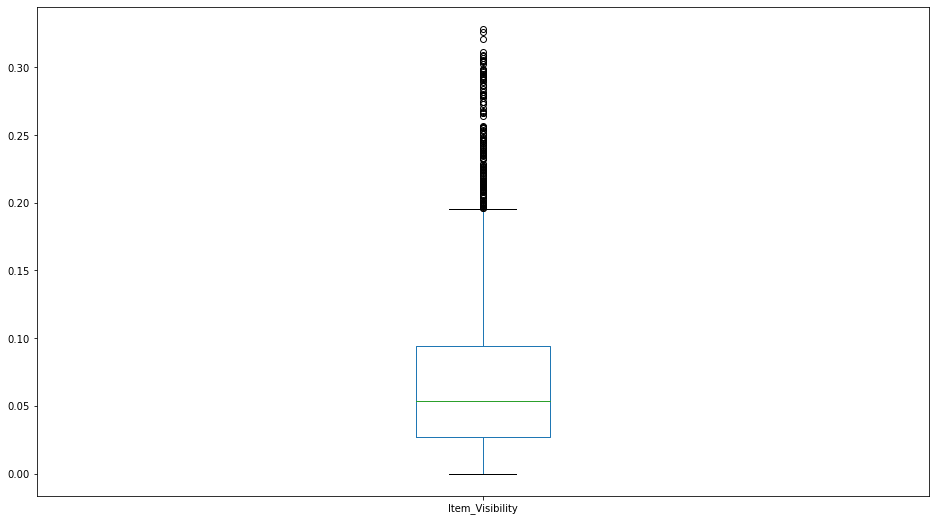

In [95]:
plt.figure(figsize=(16,9))
df2['Item_Visibility'].plot(kind='box')
plt.show()

In [91]:
Q1 = df2['Item_Visibility'].quantile(0.25)
Q3 = df2['Item_Visibility'].quantile(0.75)

In [96]:
IQR = Q3 - Q1

In [97]:
IQR

0.067595815

In [99]:
filt_train = df2[(df2.Item_Visibility >= (Q1 - 1.5*IQR)) & (df2.Item_Visibility <= (Q3 + 1.5*IQR))]

In [101]:
((df2.shape[0] - filt_train.shape[0])/df2.shape[0])*100

1.689545934530095

In [102]:
df3 = filt_train
df3.shape

(8379, 13)

In [103]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [104]:
df3['Item_Visibility'].min(), df3['Item_Visibility'].max()

(0.0, 0.195721125)

In [105]:
#creating a category
df3['Item_Visibility_bins'] = pd.cut(df3['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], # Creating bins for visibility
                                       labels=['Low Viz', 'Viz', 'High Viz'], include_lowest=True)   # need to specify columns, bins and labels

In [106]:
df3['Item_Visibility_bins']

0        Low Viz
1        Low Viz
2        Low Viz
3        Low Viz
4        Low Viz
          ...   
8518     Low Viz
8519     Low Viz
8520     Low Viz
8521    High Viz
8522     Low Viz
Name: Item_Visibility_bins, Length: 8379, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [107]:
df3['Item_Visibility_bins'].value_counts()

Low Viz     4929
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

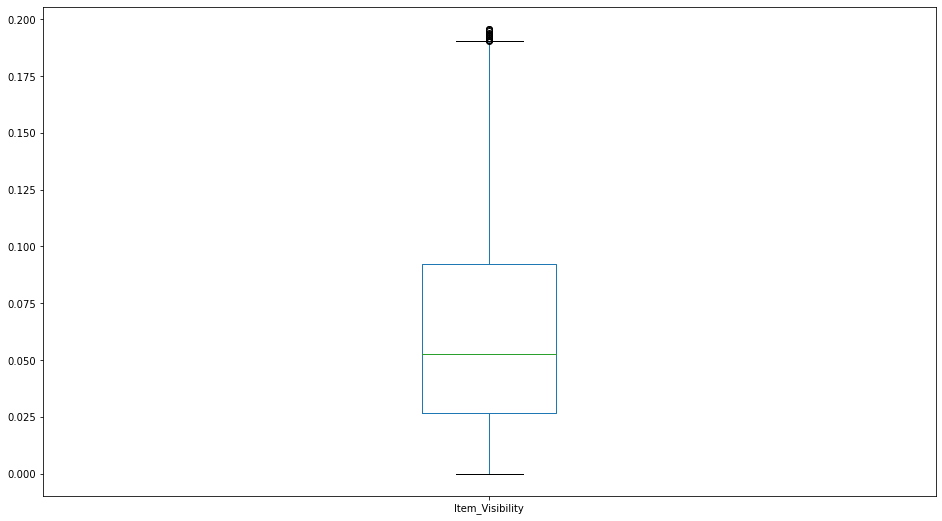

In [108]:
plt.figure(figsize=(16,9))
df3['Item_Visibility'].plot(kind='box')
plt.show()

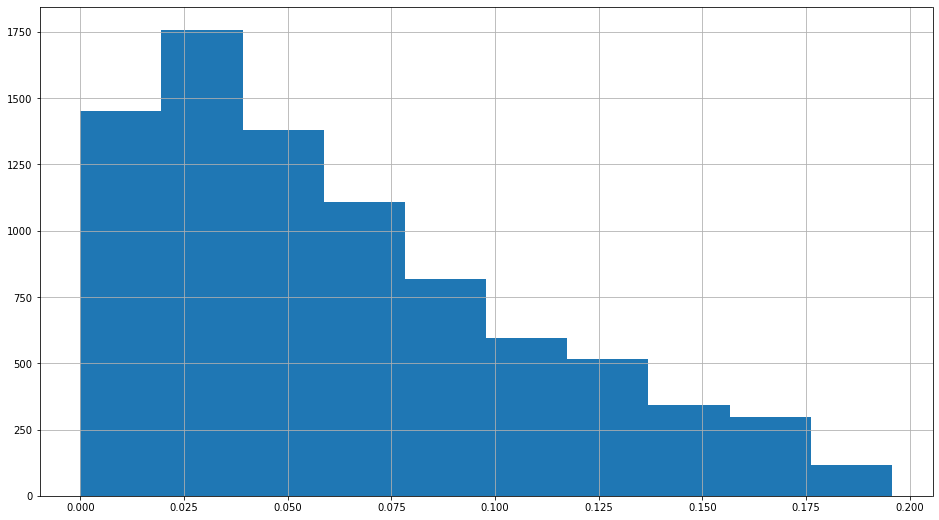

In [109]:
plt.figure(figsize=(16,9))
df3['Item_Visibility'].hist()
plt.show()

## 5. Handeling categorical Datat using Different techniques

In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8379 non-null   object  
 1   Item_Weight                8379 non-null   float64 
 2   Item_Fat_Content           8379 non-null   object  
 3   Item_Visibility            8379 non-null   float64 
 4   Item_Type                  8379 non-null   object  
 5   Item_MRP                   8379 non-null   float64 
 6   Outlet_Identifier          8379 non-null   object  
 7   Outlet_Establishment_Year  8379 non-null   int64   
 8   Outlet_Size                8379 non-null   object  
 9   Outlet_Location_Type       8379 non-null   object  
 10  Outlet_Type                8379 non-null   object  
 11  Item_Outlet_Sales          8379 non-null   float64 
 12  Age                        8379 non-null   int64   
 13  Item_Visibility_bins       8379 n

In [111]:
df3.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [112]:
df3.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [113]:
df3.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [114]:
df3.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [115]:
df3.Item_Visibility_bins.unique()

['Low Viz', 'Viz', 'High Viz']
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [116]:
df4 = pd.get_dummies(df3, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Visibility_bins'])

In [117]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8379 non-null   object 
 1   Item_Weight                    8379 non-null   float64
 2   Item_Visibility                8379 non-null   float64
 3   Item_Type                      8379 non-null   object 
 4   Item_MRP                       8379 non-null   float64
 5   Outlet_Identifier              8379 non-null   object 
 6   Outlet_Establishment_Year      8379 non-null   int64  
 7   Item_Outlet_Sales              8379 non-null   float64
 8   Age                            8379 non-null   int64  
 9   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 10  Item_Fat_Content_Regular       8379 non-null   uint8  
 11  Outlet_Size_High               8379 non-null   uint8  
 12  Outlet_Size_Medium             8379 non-null   u

In [120]:
df4.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Age', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Visibility_bins_Low Viz', 'Item_Visibility_bins_Viz',
       'Item_Visibility_bins_High Viz'],
      dtype='object')

## 6. Drop Unnecessary Columns from Data

In [121]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8379 non-null   object 
 1   Item_Weight                    8379 non-null   float64
 2   Item_Visibility                8379 non-null   float64
 3   Item_Type                      8379 non-null   object 
 4   Item_MRP                       8379 non-null   float64
 5   Outlet_Identifier              8379 non-null   object 
 6   Outlet_Establishment_Year      8379 non-null   int64  
 7   Item_Outlet_Sales              8379 non-null   float64
 8   Age                            8379 non-null   int64  
 9   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 10  Item_Fat_Content_Regular       8379 non-null   uint8  
 11  Outlet_Size_High               8379 non-null   uint8  
 12  Outlet_Size_Medium             8379 non-null   u

In [122]:
cols_to_drop =['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Item_Visibility']

In [123]:
df5 = df4.drop(cols_to_drop, axis=1)

In [127]:
df5.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
0,9.30,249.8092,3735.1380,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.92,48.2692,443.4228,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,141.6180,2097.2700,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.20,182.0950,732.3800,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.93,53.8614,994.7052,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0


In [128]:
df5.tail()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
8518,6.865,214.5218,2778.3834,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
8519,8.380,108.1570,549.2850,19,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,85.1224,1193.1136,17,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8521,7.210,103.1332,1845.5976,12,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
8522,14.800,75.4670,765.6700,24,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0


In [124]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8379 non-null   float64
 1   Item_MRP                       8379 non-null   float64
 2   Item_Outlet_Sales              8379 non-null   float64
 3   Age                            8379 non-null   int64  
 4   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 5   Item_Fat_Content_Regular       8379 non-null   uint8  
 6   Outlet_Size_High               8379 non-null   uint8  
 7   Outlet_Size_Medium             8379 non-null   uint8  
 8   Outlet_Size_Small              8379 non-null   uint8  
 9   Outlet_Location_Type_Tier 1    8379 non-null   uint8  
 10  Outlet_Location_Type_Tier 2    8379 non-null   uint8  
 11  Outlet_Location_Type_Tier 3    8379 non-null   uint8  
 12  Outlet_Type_Grocery Store      8379 non-null   u

In [125]:
df5.isnull().sum()

Item_Weight                      0
Item_MRP                         0
Item_Outlet_Sales                0
Age                              0
Item_Fat_Content_Low Fat         0
Item_Fat_Content_Regular         0
Outlet_Size_High                 0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 1      0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Item_Visibility_bins_Low Viz     0
Item_Visibility_bins_Viz         0
Item_Visibility_bins_High Viz    0
dtype: int64

In [126]:
df5.columns

Index(['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Age',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Visibility_bins_Low Viz',
       'Item_Visibility_bins_Viz', 'Item_Visibility_bins_High Viz'],
      dtype='object')

In [130]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8379.0,12.864794,4.242004,4.555,9.3000,12.857645,16.1000,21.3500
Item_MRP,8379.0,140.968471,62.272255,31.290,93.7949,142.915400,185.6253,266.8884
Item_Outlet_Sales,8379.0,2212.891704,1703.559375,33.290,874.8612,1830.950000,3124.5994,13086.9648
Age,8379.0,23.051557,8.352477,12.000,17.0000,22.000000,34.0000,36.0000
Item_Fat_Content_Low Fat,8379.0,0.648287,0.477533,0.000,0.0000,1.000000,1.0000,1.0000
Item_Fat_Content_Regular,8379.0,0.351713,0.477533,0.000,0.0000,0.000000,1.0000,1.0000
Outlet_Size_High,8379.0,0.111230,0.314436,0.000,0.0000,0.000000,0.0000,1.0000
Outlet_Size_Medium,8379.0,0.612961,0.487102,0.000,0.0000,1.000000,1.0000,1.0000
Outlet_Size_Small,8379.0,0.275809,0.446947,0.000,0.0000,0.000000,1.0000,1.0000
Outlet_Location_Type_Tier 1,8379.0,0.275809,0.446947,0.000,0.0000,0.000000,1.0000,1.0000


## 7. Visulazation

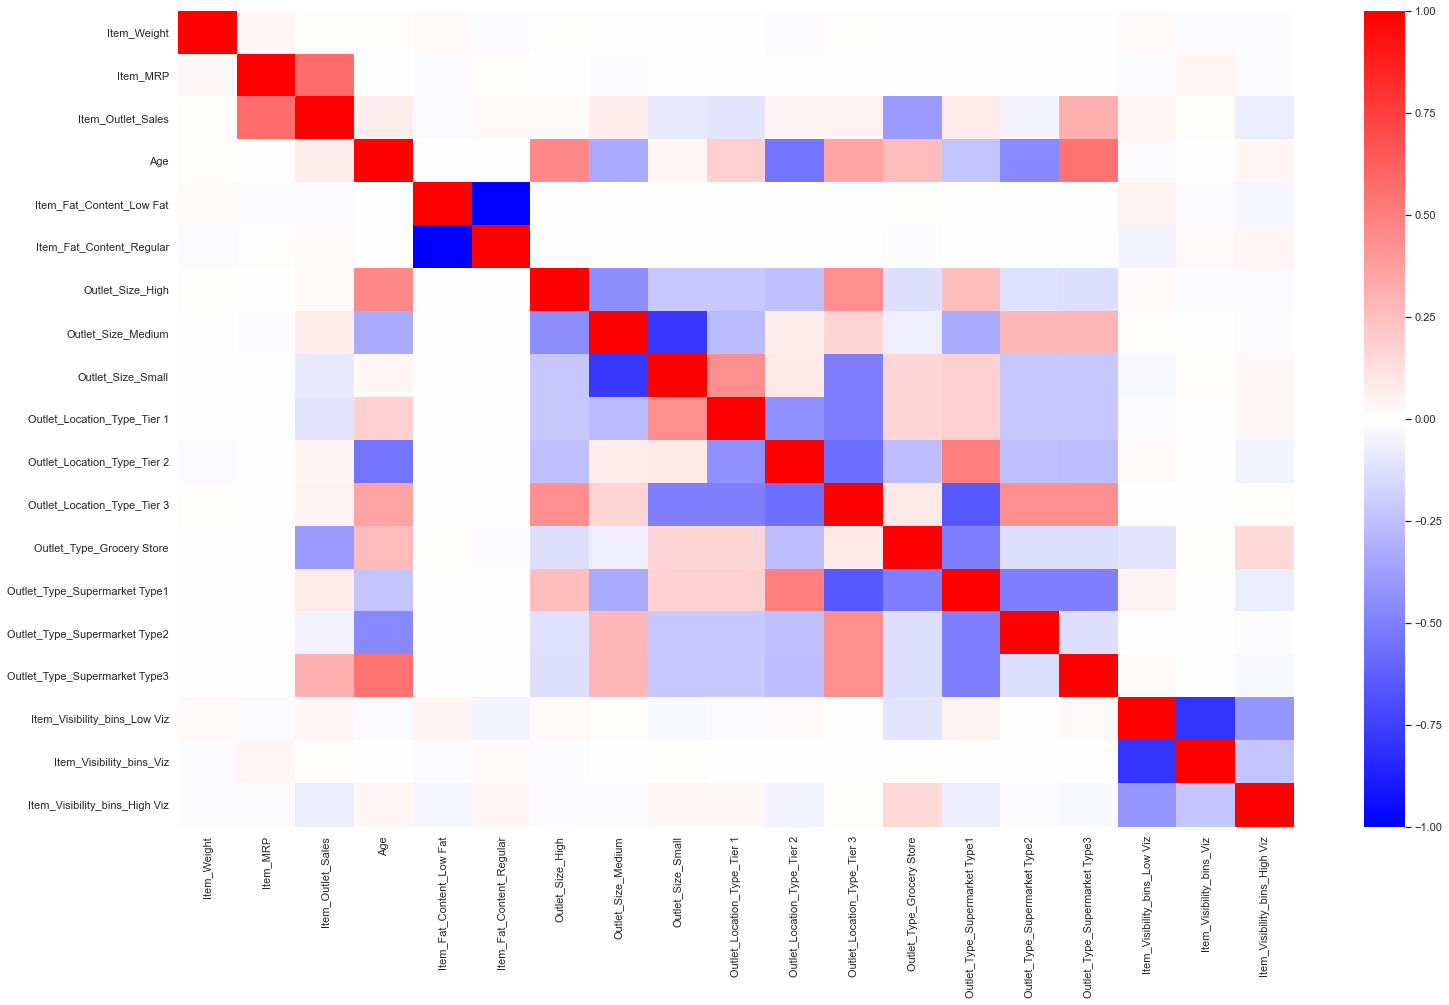

In [136]:
sns.set(rc ={'figure.figsize':(25,15)})
correlation = df5.corr()
sns.heatmap(correlation, cmap='bwr')
plt.show()

In [138]:
df5.corr(method='spearman').T

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
Item_Weight,1.000000,0.027033,0.011442,0.023089,0.019305,-0.019305,0.007585,-0.004105,-0.000863,0.004327,-0.022007,0.017275,0.014120,-0.018658,-0.004339,0.018137,0.010968,-0.003062,-0.012923
Item_MRP,0.027033,1.000000,0.577231,-0.005368,-0.008438,0.008438,0.001239,-0.008118,0.007975,-0.004055,0.002212,0.001578,-0.003834,0.003581,0.003692,-0.005204,-0.022624,0.032253,-0.012047
Item_Outlet_Sales,0.011442,0.577231,1.000000,-0.020154,-0.022929,0.022929,0.039237,0.061584,-0.094721,-0.108867,0.092688,0.010228,-0.506076,0.178261,-0.025795,0.265626,0.046366,0.006285,-0.083329
Age,0.023089,-0.005368,-0.020154,1.000000,0.003741,-0.003741,0.344341,-0.339148,0.127366,0.319613,-0.549137,0.237297,0.302059,-0.182158,-0.547484,0.516008,-0.023475,-0.001584,0.039804
Item_Fat_Content_Low Fat,0.019305,-0.008438,-0.022929,0.003741,1.000000,-1.000000,0.001428,-0.002876,0.002130,-0.003463,0.001867,0.001368,0.008920,-0.003443,-0.002876,-0.000912,0.041436,-0.020990,-0.034765
Item_Fat_Content_Regular,-0.019305,0.008438,0.022929,-0.003741,-1.000000,1.000000,-0.001428,0.002876,-0.002130,0.003463,-0.001867,-0.001368,-0.008920,0.003443,0.002876,0.000912,-0.041436,0.020990,0.034765
Outlet_Size_High,0.007585,0.001239,0.039237,0.344341,0.001428,-0.001428,1.000000,-0.445201,-0.218320,-0.218320,-0.249614,0.440754,-0.125679,0.250756,-0.124849,-0.125378,0.020628,-0.010235,-0.017626
Outlet_Size_Medium,-0.004105,-0.008118,0.061584,-0.339148,-0.002876,0.002876,-0.445201,1.000000,-0.776634,-0.266756,0.076933,0.169983,-0.068021,-0.329008,0.280432,0.281620,0.011807,-0.005503,-0.010620
Outlet_Size_Small,-0.000863,0.007975,-0.094721,0.127366,0.002130,-0.002130,-0.218320,-0.776634,1.000000,0.444314,0.091764,-0.495334,0.162550,0.182155,-0.217793,-0.218716,-0.027380,0.013198,0.023974
Outlet_Location_Type_Tier 1,0.004327,-0.004055,-0.108867,0.319613,-0.003463,0.003463,-0.218320,-0.266756,0.444314,1.000000,-0.435440,-0.495334,0.162550,0.182155,-0.217793,-0.218716,-0.019241,0.000439,0.030032


In [139]:
df5.corr(method='pearson').T

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
Item_Weight,1.000000,0.025431,0.009691,0.008421,0.021636,-0.021636,0.011789,-0.005628,-0.002161,0.002997,-0.015997,0.012693,0.007492,-0.005084,0.000711,-0.000597,0.015728,-0.008152,-0.012920
Item_MRP,0.025431,1.000000,0.577367,-0.006896,-0.008048,0.008048,0.002599,-0.008736,0.007692,-0.003574,0.002252,0.001099,-0.005693,0.005560,0.004025,-0.006640,-0.022884,0.031707,-0.010818
Item_Outlet_Sales,0.009691,0.577367,1.000000,0.065382,-0.021670,0.021670,0.017882,0.071209,-0.090186,-0.103378,0.046018,0.050239,-0.390714,0.085544,-0.045038,0.308155,0.032108,0.013811,-0.071820
Age,0.008421,-0.006896,0.065382,1.000000,0.003918,-0.003918,0.463746,-0.331450,0.034974,0.183650,-0.539153,0.352141,0.263397,-0.232177,-0.466983,0.549453,-0.019777,-0.002664,0.035517
Item_Fat_Content_Low Fat,0.021636,-0.008048,-0.021670,0.003918,1.000000,-1.000000,0.001428,-0.002876,0.002130,-0.003463,0.001867,0.001368,0.008920,-0.003443,-0.002876,-0.000912,0.041436,-0.020990,-0.034765
Item_Fat_Content_Regular,-0.021636,0.008048,0.021670,-0.003918,-1.000000,1.000000,-0.001428,0.002876,-0.002130,0.003463,-0.001867,-0.001368,-0.008920,0.003443,0.002876,0.000912,-0.041436,0.020990,0.034765
Outlet_Size_High,0.011789,0.002599,0.017882,0.463746,0.001428,-0.001428,1.000000,-0.445201,-0.218320,-0.218320,-0.249614,0.440754,-0.125679,0.250756,-0.124849,-0.125378,0.020628,-0.010235,-0.017626
Outlet_Size_Medium,-0.005628,-0.008736,0.071209,-0.331450,-0.002876,0.002876,-0.445201,1.000000,-0.776634,-0.266756,0.076933,0.169983,-0.068021,-0.329008,0.280432,0.281620,0.011807,-0.005503,-0.010620
Outlet_Size_Small,-0.002161,0.007692,-0.090186,0.034974,0.002130,-0.002130,-0.218320,-0.776634,1.000000,0.444314,0.091764,-0.495334,0.162550,0.182155,-0.217793,-0.218716,-0.027380,0.013198,0.023974
Outlet_Location_Type_Tier 1,0.002997,-0.003574,-0.103378,0.183650,-0.003463,0.003463,-0.218320,-0.266756,0.444314,1.000000,-0.435440,-0.495334,0.162550,0.182155,-0.217793,-0.218716,-0.019241,0.000439,0.030032


In [140]:
dc = dict()
for i in list(df5.columns):
    dc[i] = i.replace(' ','_')

In [141]:
df6 = df5.rename(dc, axis=1)

In [142]:
formula = 'Item_Outlet_Sales ~ ' + ' + '.join(list(df6.drop('Item_Outlet_Sales', axis=1).columns))

In [143]:
import statsmodels.formula.api as smf
lm = smf.ols(formula=formula, data=df6).fit()

In [144]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     813.9
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:55:11   Log-Likelihood:                -70808.
No. Observations:                8379   AIC:                         1.416e+05
Df Residuals:                    8365   BIC:                         1.417e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       463.5580    131.140      3.535      0.000     206.492     720.624
Item_Weight                      -0.8289      2.921     -0.284      0.777      -6.554       4.896
Item_MRP                         15.7924      0.199     79.374      0.000      15.402      16.182
Age                             -40.0510     10.260     -3.904      0.000     -60.162     -19.940
Item_Fat_Content_Low_Fat        207.3178     66.819      3.103      0.002      76.336     338.300
Item_Fat_Content_Regular        256.2402     66.864      3.832      0.000     125.169     387.311
Outlet_Size_High                765.7665    210.642      3.635      0.000     352.855    1178.678
Outlet_Size_Medium             -188.9023     48.143     -3.924      0.000    -283.275     -94.529
Outlet_Size_Small              -113.3062     46.830     -2.420      0.016    -205.104     -21.508
Outlet_Location_Type_Tier_1     395.6883    110.305      3.587      0.000     179.463     611.914
Outlet_Location_Type_Tier_2     166.0173     57.719      2.876      0.004      52.873     279.161
Outlet_Location_Type_Tier_3     -98.1476     52.328     -1.876      0.061    -200.724       4.429
Outlet_Type_Grocery_Store     -1520.2524     67.563    -22.501      0.000   -1652.693   -1387.812
Outlet_Type_Supermarket_Type1   -79.0225     85.114     -0.928      0.353    -245.866      87.821
Outlet_Type_Supermarket_Type2  -313.1069     70.593     -4.435      0.000    -451.487    -174.727
Outlet_Type_Supermarket_Type3  2375.9398    197.568     12.026      0.000    1988.657    2763.222
Item_Visibility_bins_Low_Viz    164.8234     47.147      3.496      0.000      72.404     257.243
Item_Visibility_bins_Viz        162.1705     48.075      3.373      0.001      67.932     256.409
Item_Visibility_bins_High_Viz   136.5641     51.883      2.632      0.008      34.861     238.267
==============================================================================
Omnibus:                      909.825   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.563
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       5.131   Cond. No.                     1.29e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [146]:
df6.columns

Index(['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Age',
       'Item_Fat_Content_Low_Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier_1', 'Outlet_Location_Type_Tier_2',
       'Outlet_Location_Type_Tier_3', 'Outlet_Type_Grocery_Store',
       'Outlet_Type_Supermarket_Type1', 'Outlet_Type_Supermarket_Type2',
       'Outlet_Type_Supermarket_Type3', 'Item_Visibility_bins_Low_Viz',
       'Item_Visibility_bins_Viz', 'Item_Visibility_bins_High_Viz'],
      dtype='object')

In [147]:
df6.head(5)

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Grocery_Store,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3,Item_Visibility_bins_Low_Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High_Viz
0,9.30,249.8092,3735.1380,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.92,48.2692,443.4228,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,141.6180,2097.2700,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.20,182.0950,732.3800,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.93,53.8614,994.7052,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0


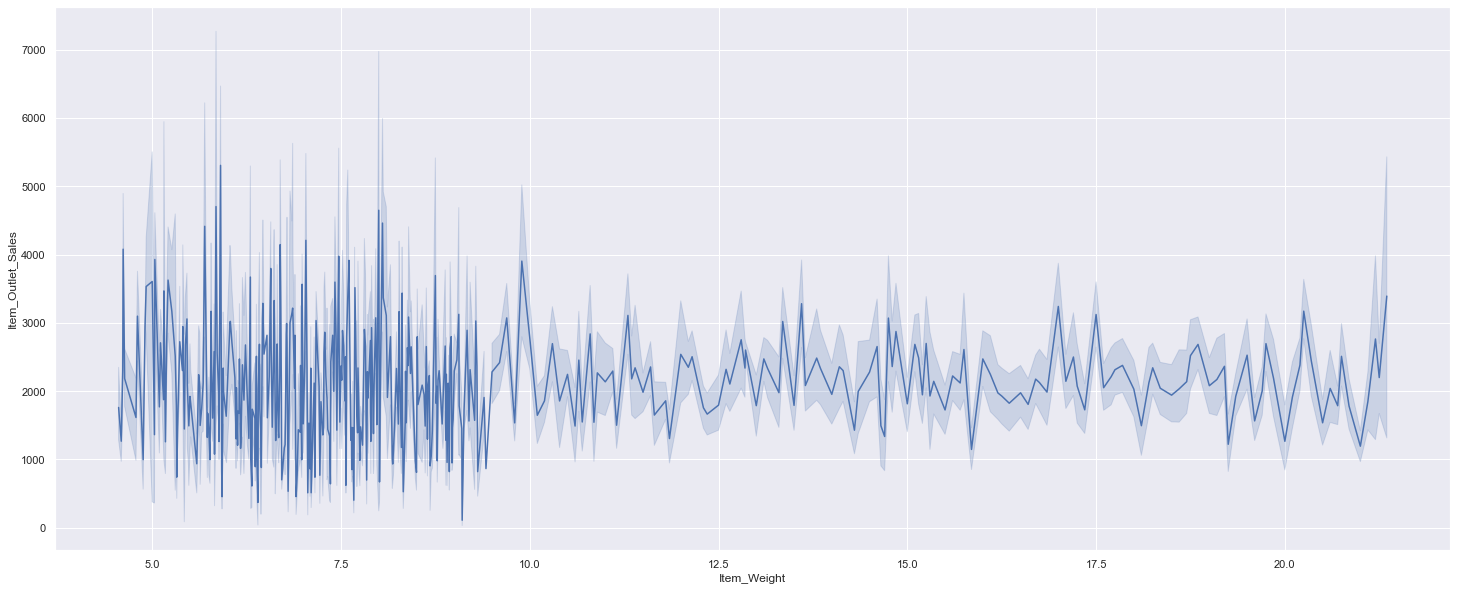

In [150]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.lineplot(x='Item_Weight',y='Item_Outlet_Sales',data=df6)
plt.show()

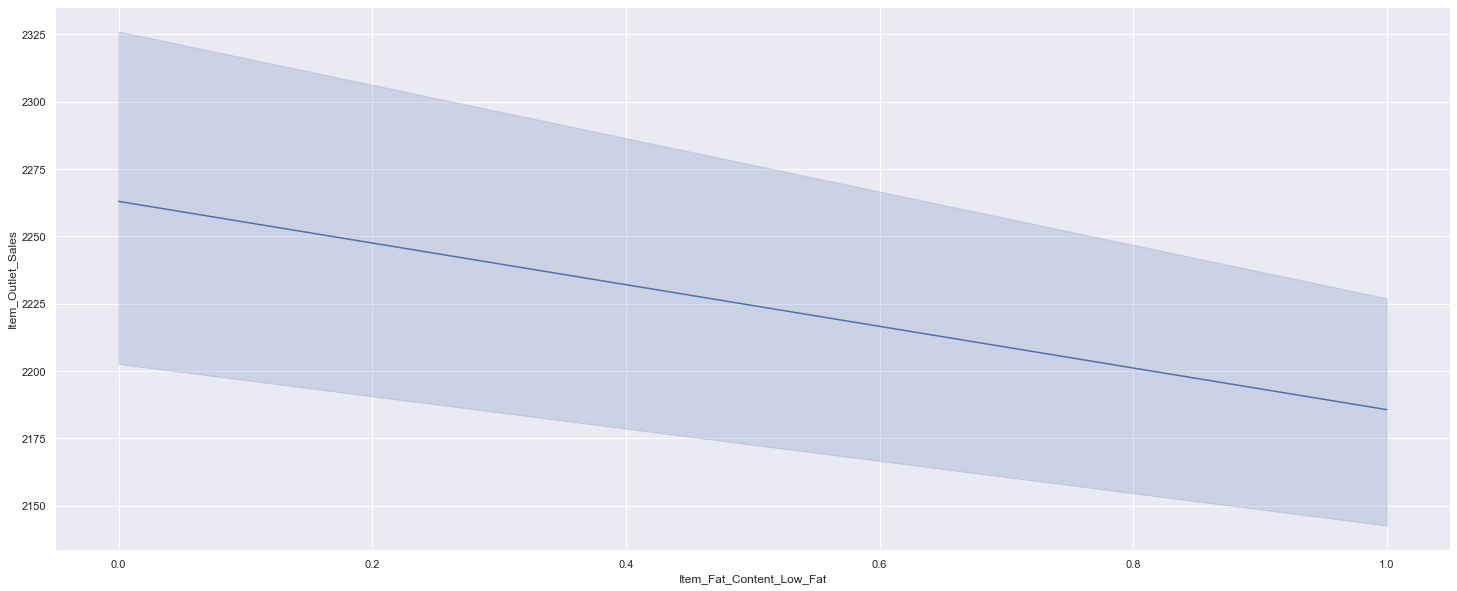

In [152]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.lineplot(x='Item_Fat_Content_Low_Fat',y='Item_Outlet_Sales',data=df6)
plt.show()

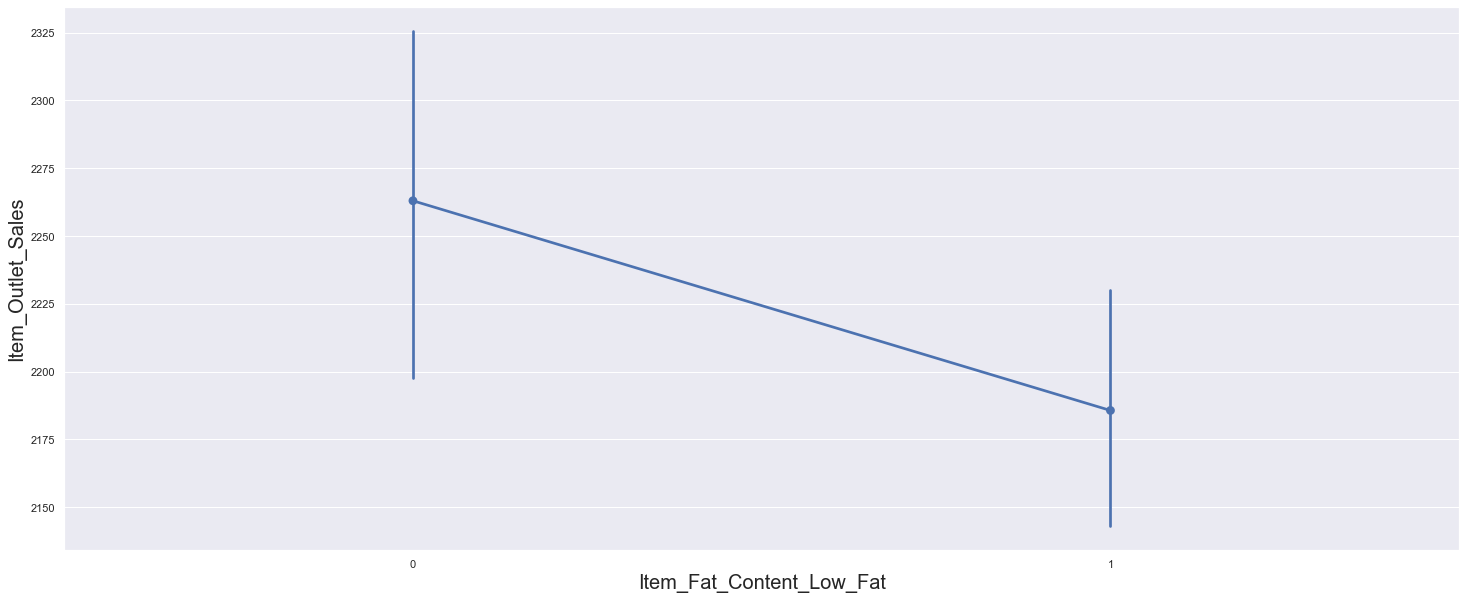

In [158]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.pointplot(x='Item_Fat_Content_Low_Fat',y='Item_Outlet_Sales',data=df6)
plt.xlabel('Item_Fat_Content_Low_Fat',fontsize =20)
plt.ylabel('Item_Outlet_Sales',fontsize = 20)
plt.show()

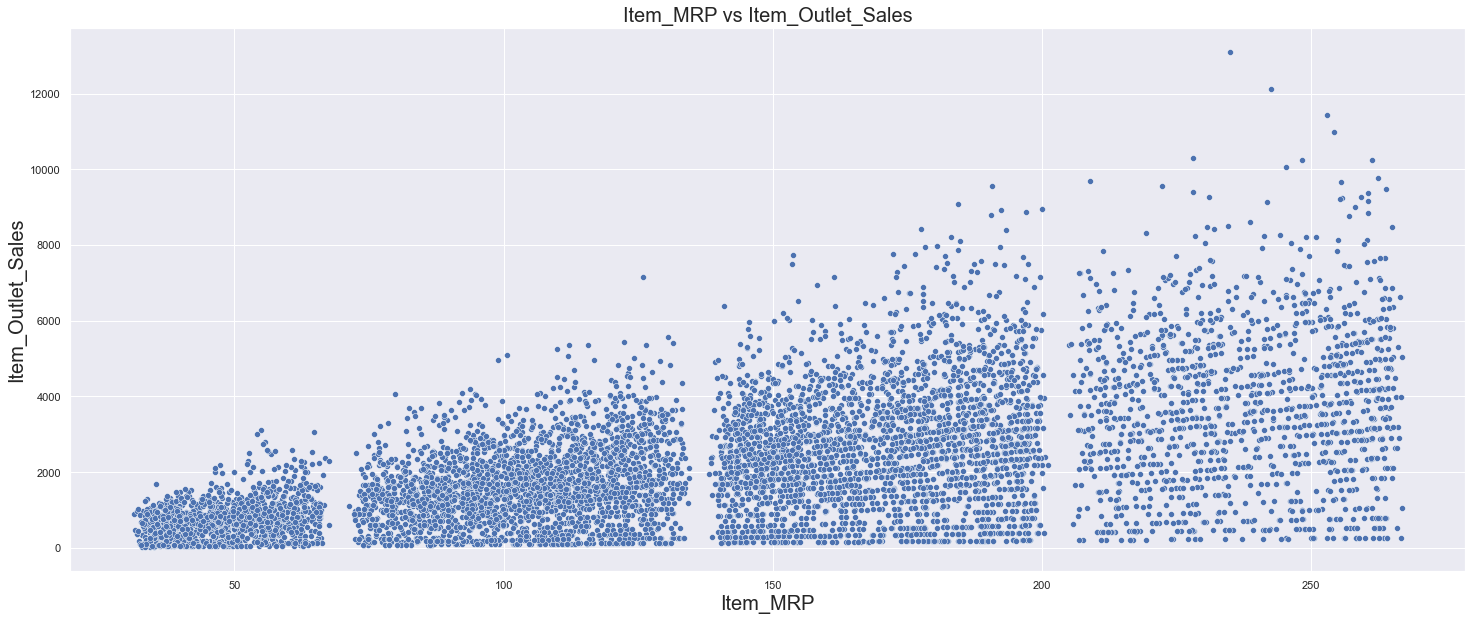

In [178]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df6)
plt.title('Item_MRP vs Item_Outlet_Sales',fontsize =20)
plt.xlabel('Item_MRP',fontsize =20)
plt.ylabel('Item_Outlet_Sales',fontsize = 20)
plt.show()

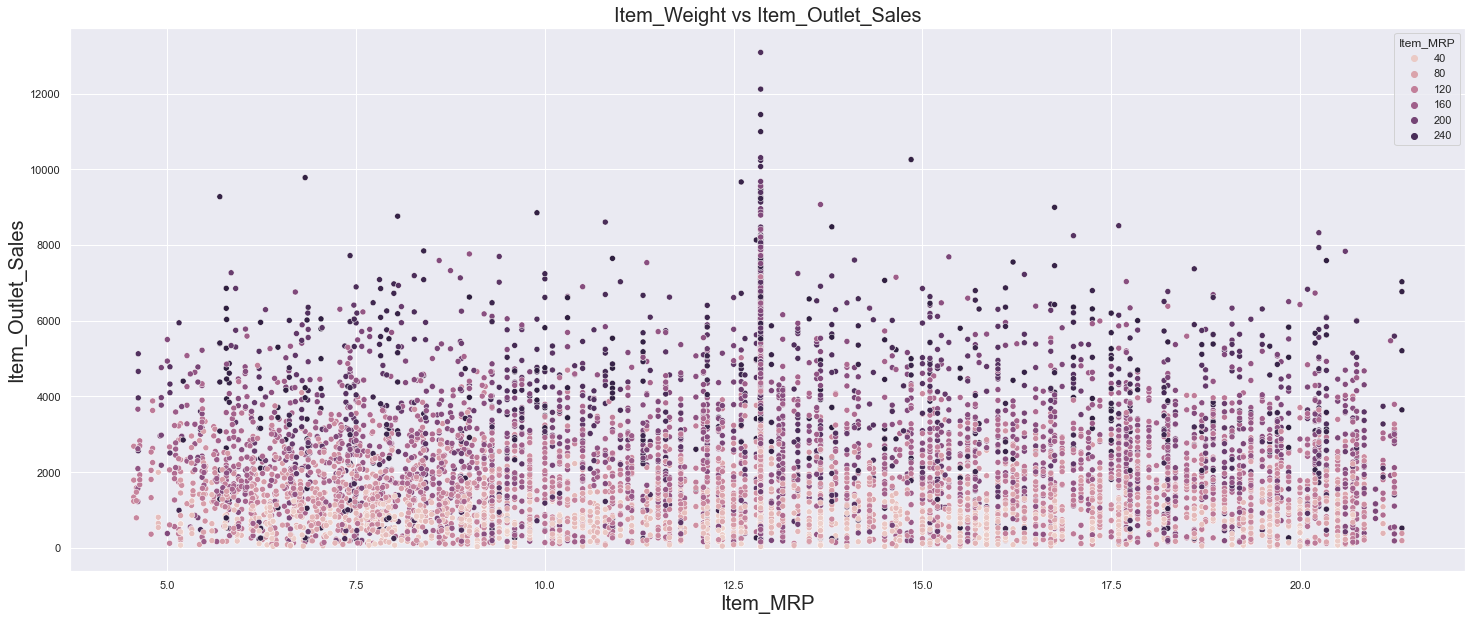

In [177]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df6,hue='Item_MRP')
plt.title('Item_Weight vs Item_Outlet_Sales',fontsize =20)
plt.xlabel('Item_MRP',fontsize =20)
plt.ylabel('Item_Outlet_Sales',fontsize = 20)
plt.show()

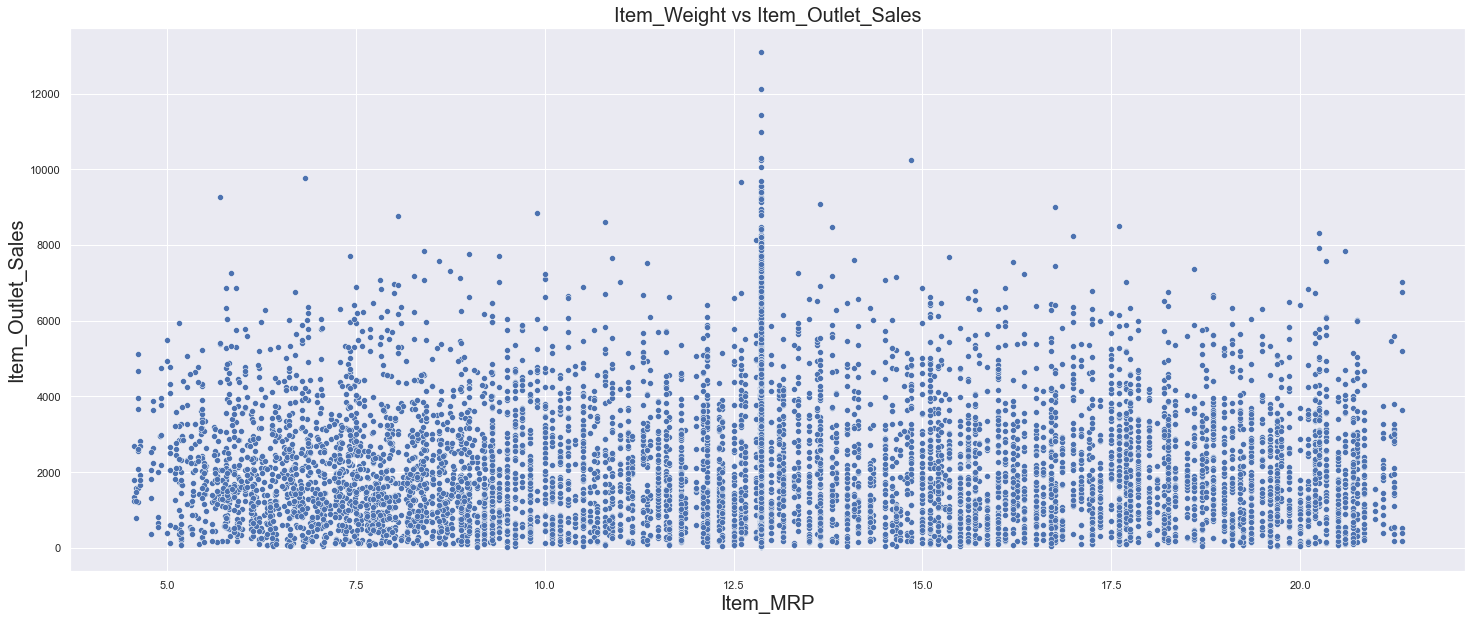

In [176]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df6,hue_norm='Item_MRP')
plt.title('Item_Weight vs Item_Outlet_Sales',fontsize =20)
plt.xlabel('Item_MRP',fontsize =20)
plt.ylabel('Item_Outlet_Sales',fontsize = 20)
plt.show()

In [170]:
df6.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Grocery_Store,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3,Item_Visibility_bins_Low_Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High_Viz
0,9.30,249.8092,3735.1380,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.92,48.2692,443.4228,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,141.6180,2097.2700,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.20,182.0950,732.3800,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.93,53.8614,994.7052,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0


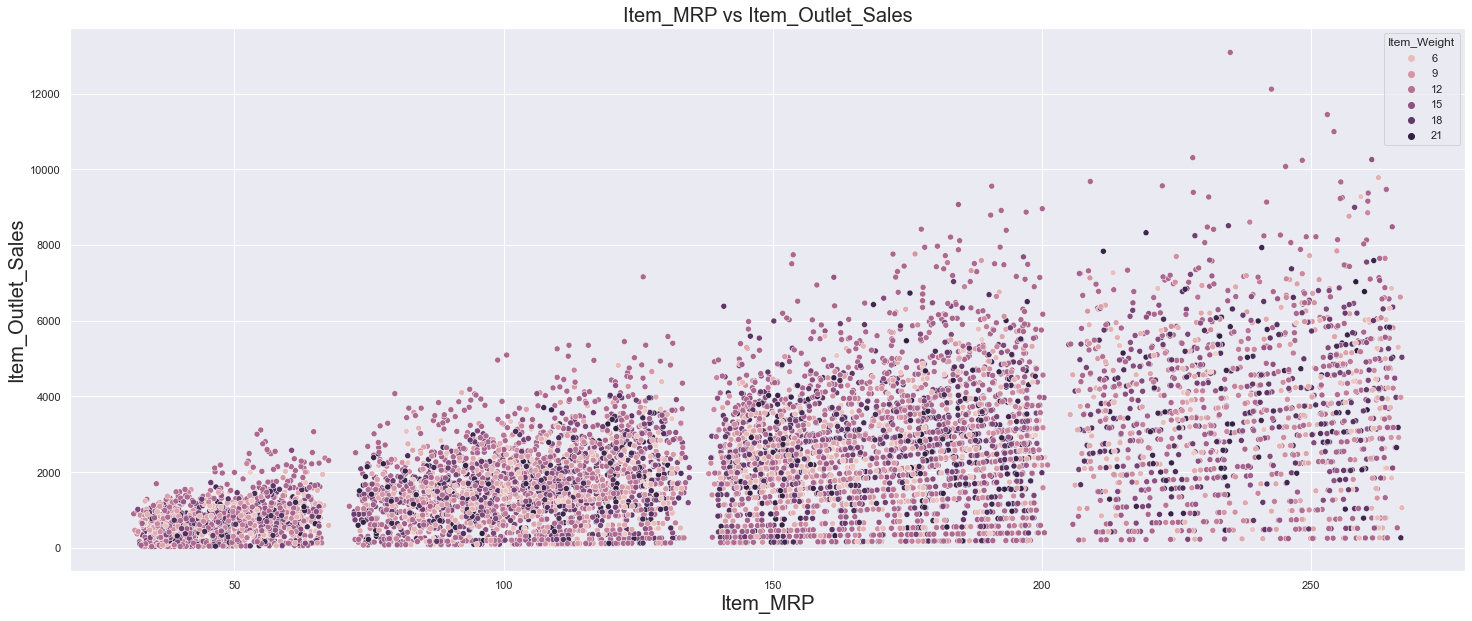

In [175]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df6,hue='Item_Weight')
plt.title('Item_MRP vs Item_Outlet_Sales',fontsize =20)
plt.xlabel('Item_MRP',fontsize =20)
plt.ylabel('Item_Outlet_Sales',fontsize = 20)
plt.show()

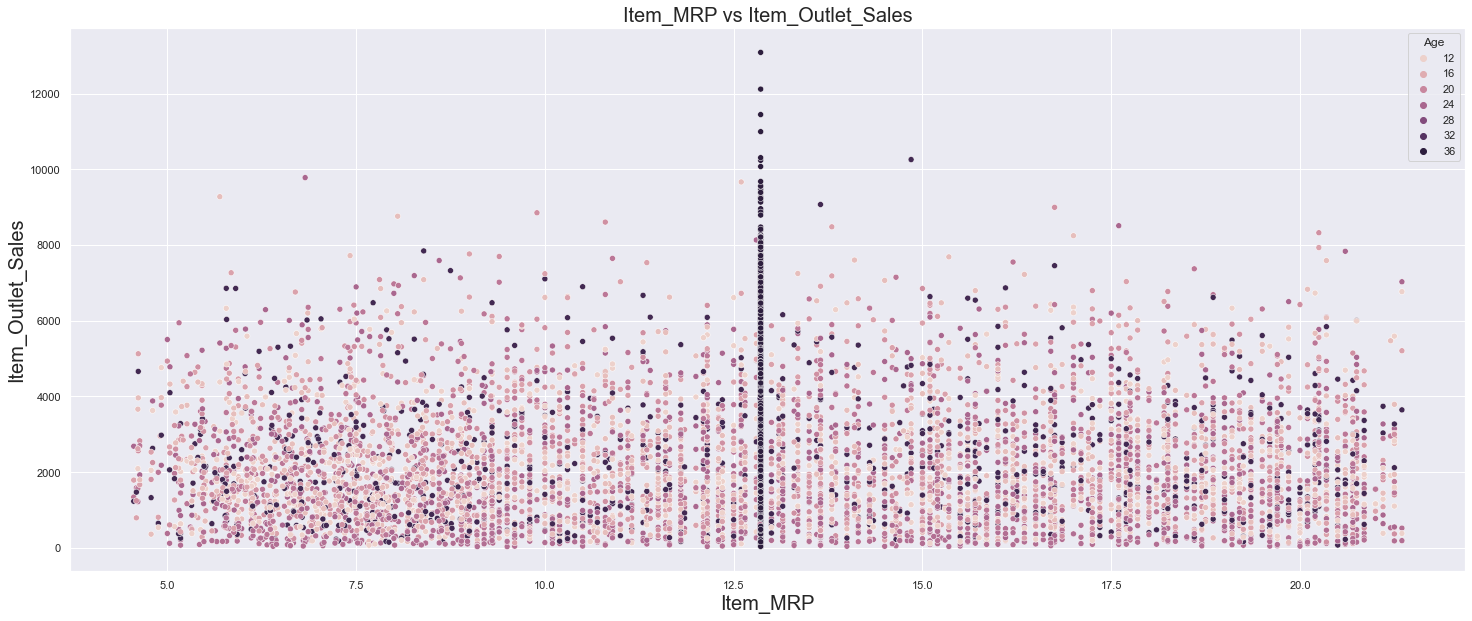

In [174]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df6,hue='Age')
plt.title('Item_MRP vs Item_Outlet_Sales',fontsize =20)
plt.xlabel('Item_MRP',fontsize =20)
plt.ylabel('Item_Outlet_Sales',fontsize = 20)
plt.show()

In [189]:
df6

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Grocery_Store,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3,Item_Visibility_bins_Low_Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High_Viz
0,9.300,249.8092,3735.1380,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.920,48.2692,443.4228,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.500,141.6180,2097.2700,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.200,182.0950,732.3800,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.930,53.8614,994.7052,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,2778.3834,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
8519,8.380,108.1570,549.2850,19,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,85.1224,1193.1136,17,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8521,7.210,103.1332,1845.5976,12,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


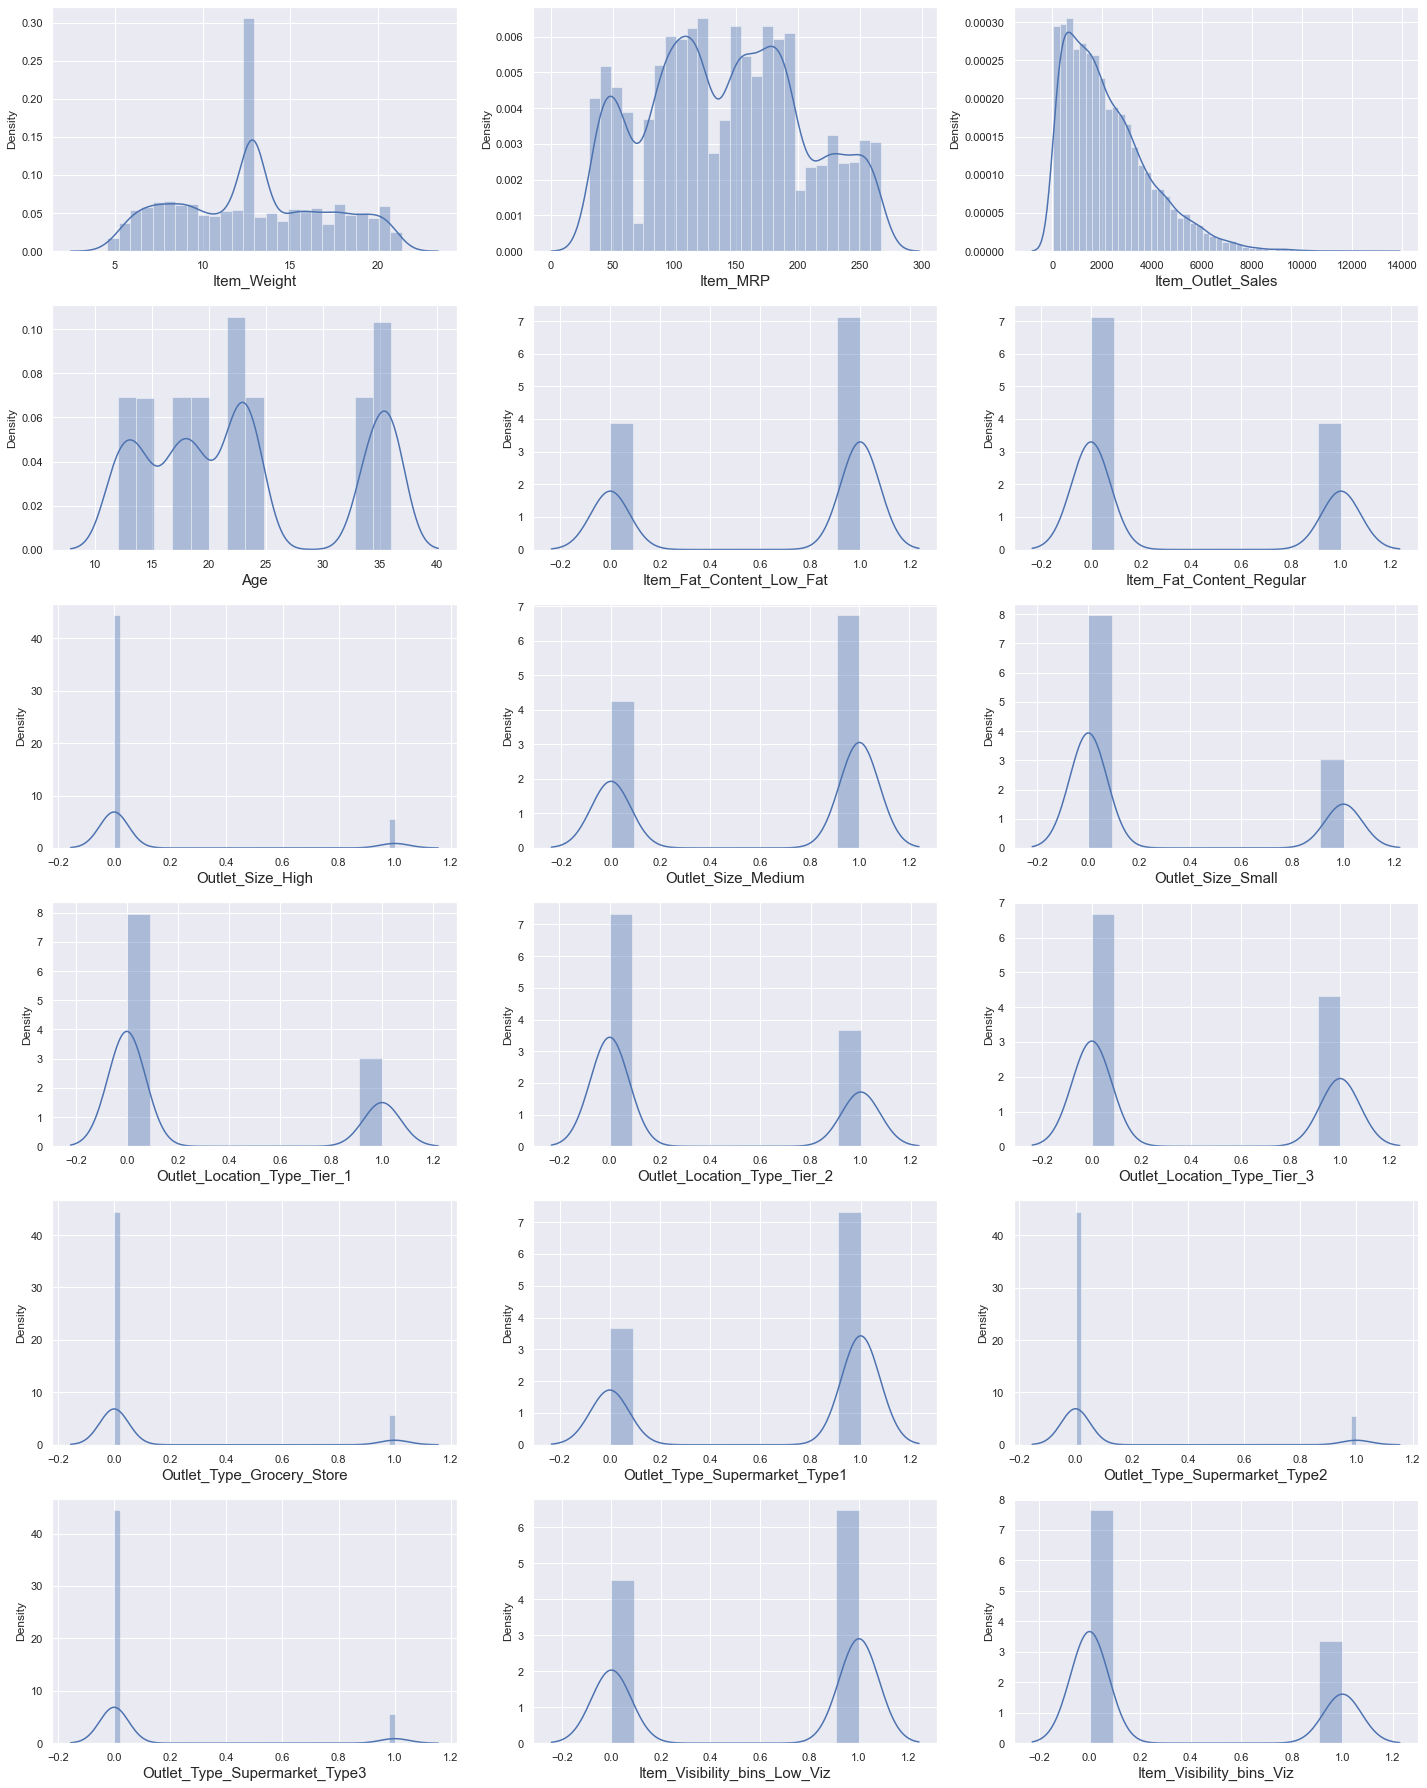

In [192]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df6:
    if plotnumber<=18: 
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df6[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## 8. Model Training Prepration

In [185]:
df6

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Grocery_Store,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3,Item_Visibility_bins_Low_Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High_Viz
0,9.300,249.8092,3735.1380,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.920,48.2692,443.4228,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.500,141.6180,2097.2700,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.200,182.0950,732.3800,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.930,53.8614,994.7052,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,2778.3834,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
8519,8.380,108.1570,549.2850,19,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,85.1224,1193.1136,17,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8521,7.210,103.1332,1845.5976,12,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [186]:
X = df6.drop('Item_Outlet_Sales', axis=1)
y = df6['Item_Outlet_Sales']

In [187]:
X

,Item_Weight,Item_MRP,Age,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Grocery_Store,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3,Item_Visibility_bins_Low_Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High_Viz
0,9.300,249.8092,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.920,48.2692,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.500,141.6180,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.200,182.0950,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.930,53.8614,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
8519,8.380,108.1570,19,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,85.1224,17,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8521,7.210,103.1332,12,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [188]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8379, dtype: float64

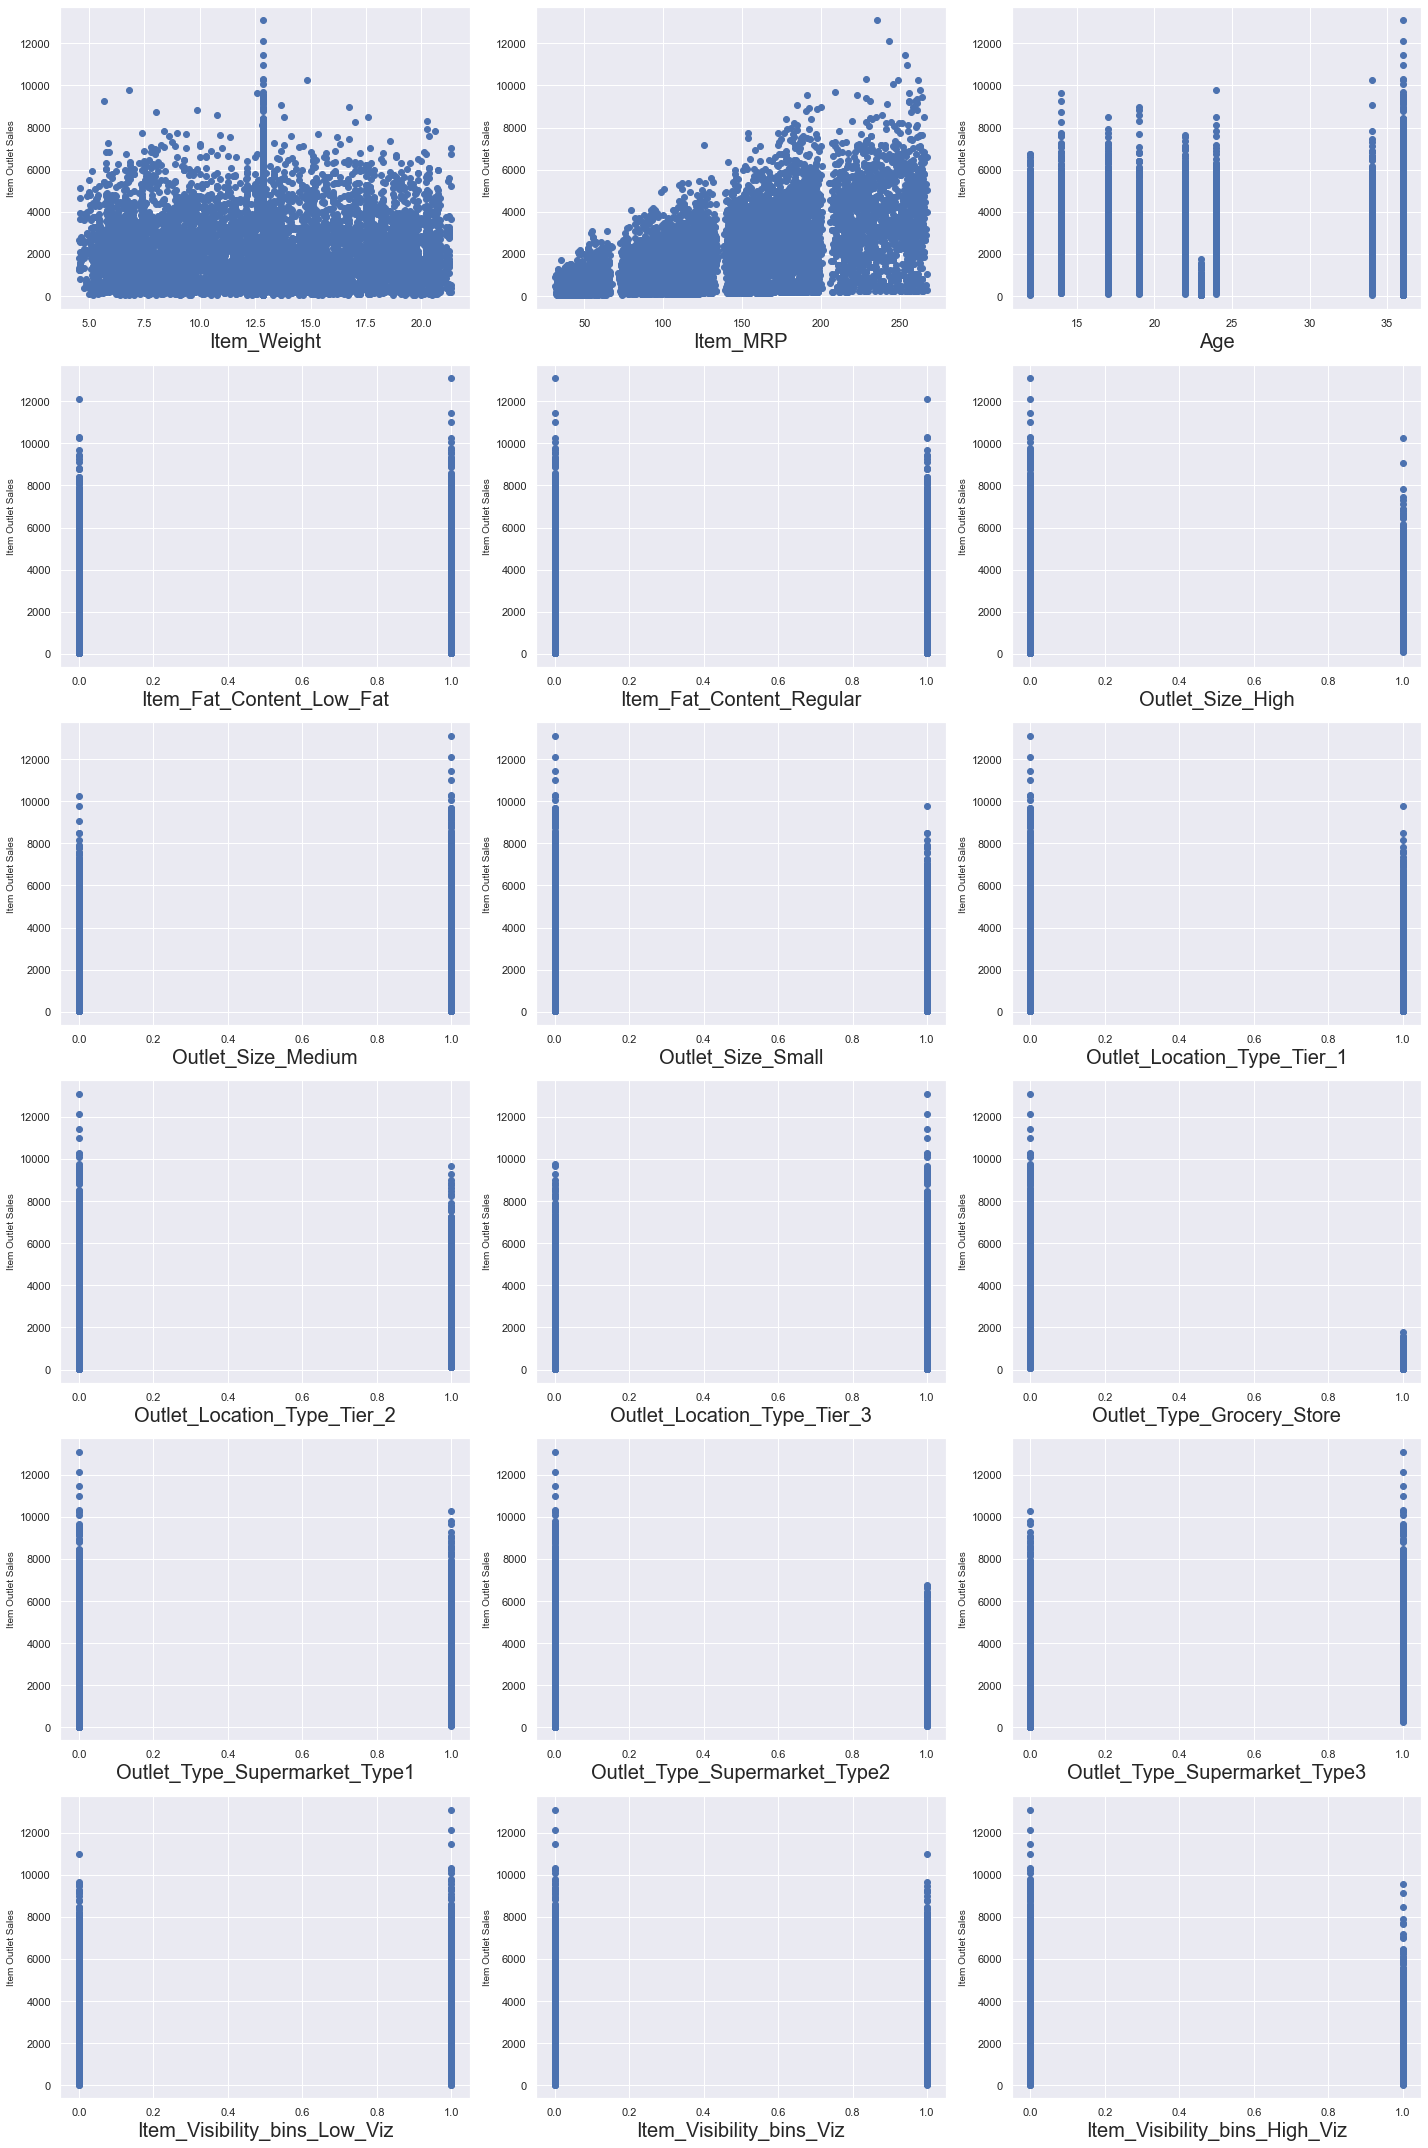

In [191]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for col in X:
    if plotnumber <=18:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Item Outlet Sales',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [193]:
scaler = StandardScaler()

In [194]:
x_scaled = scaler.fit_transform(X)

In [195]:
x_scaled

array([[-0.84040636,  1.7479249 , -0.12590519, ...,  0.83662365,
        -0.66271876, -0.34538289],
       [-1.63724716, -1.48870156, -1.32322626, ...,  0.83662365,
        -0.66271876, -0.34538289],
       [ 1.0927577 ,  0.0104311 , -0.12590519, ...,  0.83662365,
        -0.66271876, -0.34538289],
       ...,
       [-0.53392913, -0.89685854, -0.72456573, ...,  0.83662365,
        -0.66271876, -0.34538289],
       [-1.33312745, -0.60761456, -1.32322626, ..., -1.19528057,
        -0.66271876,  2.89533741],
       [ 0.45622807, -1.05191919,  0.11355902, ...,  0.83662365,
        -0.66271876, -0.34538289]])

In [223]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [224]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [225]:
regression.coef_

array([-7.11064925e+00,  9.82782435e+02, -3.47235724e+02,  3.64133403e+14,
        3.64133403e+14,  6.57436516e+14,  1.01845342e+15,  9.34497079e+14,
       -1.17662693e+15, -1.24019466e+15, -1.28518656e+15, -2.23326730e+14,
       -3.34007202e+14, -2.22178850e+14, -2.22910452e+14,  2.70426115e+15,
        2.53023662e+15,  1.69554888e+15])

In [226]:
regression.intercept_

2224.222524428216

In [227]:
regression.score(x_train,y_train)

0.5603530200528015

In [228]:
regression.score(x_test,y_test)

0.5528978385617072

In [229]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [230]:
adj_r2(x_train,y_train)

0.5589993345175552

In [231]:
adj_r2(x_test,y_test)

0.5496722518258798

## 9. Lasso Regularization

In [232]:
lasscv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [233]:
#best alpha paramter
alpha=lasscv.alpha_
alpha

0.012918499768923878

In [234]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.012918499768923878)

In [264]:
lasso_reg.score(x_train,y_train)

0.5603599988997552

In [265]:
lasso_reg.score(x_test,y_test)

0.5529624932707073

### 10. Ridge Regression Model

In [237]:
import numpy as np

In [238]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridge_cv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([2.4820851 , 5.42329827, 6.16961554, 6.73621912, 4.69580753,
       3.62097865, 0.51345892, 4.78676729, 8.59071935, 9.62142212,
       9.92973198, 3.98801312, 4.31229967, 9.34124086, 1.22473879,
       5.68883549, 8.38010665, 3.89396095, 1.95410989, 6.80231271,
       1.13591325, 2.80259208, 1.44864585, 5.79611594, 3.78889621,
       0.5863612 , 9.51698   , 6.1362171 , 1.77357593, 2.11891834,
       1.63325318, 3.92266846, 8.89888344, 3.01268762, 7.69980466,
       9.39074807, 3.96512396, 8.47849893, 7.94514734, 0.26945362,
       5.05742984, 0.98715397, 8.70187773, 6.11471667, 4.81175314,
       0.20659336, 7.25957573, 1.82092096, 1.83883817, 1.13545801]),
        cv=10, normalize=True)

In [239]:
#Best possible alpha value
ridge_cv.alpha_

0.20659335510793242

In [240]:
ridge_model=Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.20659335510793242)

In [263]:
ridge_model.score(x_train,y_train)

0.5603599984636993

In [241]:
ridge_model.score(x_test,y_test)

0.5529632680484164

## 11. Elastic Net

In [274]:
elastic_cv=ElasticNetCV(alphas=None,cv=5865)
elastic_cv.fit(x_train,y_train)

ElasticNetCV(cv=5865)

In [275]:
elastic_cv.alpha_

1.98324255980447

In [276]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
# preference to L1 and L2
elastic_cv.l1_ratio

0.5

In [289]:
elastic_reg=ElasticNet(alpha=elastic_cv.alpha_,l1_ratio=0.5)
elastic_reg.fit(x_train,y_train)

ElasticNet(alpha=1.98324255980447)

In [290]:
elastic_reg.score(x_train,y_train)

0.4311078308334695

In [291]:
elastic_reg.score(x_test,y_test)

0.4309347027235535

## 12. Hyperparamtere Tunning

In [301]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [302]:
gscv = GridSearchCV(lasso_reg, param_grid=parameters, cv=3)

In [303]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(alpha=0.012918499768923878),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [304]:
gscv.best_params_['alpha']

0.01

In [305]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(alpha=0.012918499768923878),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [306]:
gscv.score(x_train,y_train)

0.5603600093968897

In [308]:
gscv.score(x_test,y_test)

0.5529620786488698

## Algorithms-2 : SVR

In [322]:
from sklearn.svm import SVR

In [353]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.10,random_state=345)

In [354]:
model = SVR()

In [355]:
model.fit(x_train,y_train)

SVR()

In [356]:
model.score(x_train,y_train)

0.04307093005980267

In [357]:
model.score(x_test,y_test)

0.038224165828100065

## Algorithms-3 : Decission Tree

In [358]:
from sklearn.tree import DecisionTreeRegressor

In [413]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=10)

In [414]:
dtc = DecisionTreeRegressor()

In [415]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [416]:
dtc.score(x_train,y_train)

0.9992673815624239

In [417]:
dtc.score(x_test,y_test)

0.1549426944707304

## Algorithms-4 : Random Forest

In [423]:
from sklearn.ensemble import RandomForestRegressor

In [424]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=10)

In [438]:
Random_clf = RandomForestRegressor(n_estimators=115,random_state=16)

In [439]:
Random_clf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=115, random_state=16)

In [440]:
Random_clf.score(x_train,y_train)

0.9344826997508565

In [441]:
Random_clf.score(x_test,y_test)

0.5224379492664293

## Hyperparameter Tunning

In [471]:
Random_clf = RandomForestRegressor(criterion = 'mae',max_depth = 15,max_features = 'sqrt',min_samples_leaf = 2,min_samples_split=2
                                 ,n_estimators=140,random_state=6,n_jobs =-1)

In [472]:
Random_clf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=15, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=140, n_jobs=-1,
                      random_state=6)

In [473]:
Random_clf.score(x_train,y_train)

0.7609070195452103

In [474]:
Random_clf.score(x_test,y_test)

0.5558186465398988

In [475]:
def adj_r2(x,y):
    r2 = Random_clf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [469]:
adj_r2(x_train,y_train)

0.7605226790058833

In [470]:
adj_r2(x_test,y_test)

0.5508916435635367

## Algorithms - 5: Implementation of bagging

In [479]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [517]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=10)

In [518]:
knn = KNeighborsRegressor(n_neighbors = 30)

In [519]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [520]:
knn.score(x_train,y_train)

0.5717793384250426

In [521]:
knn.score(x_test,y_test)

0.5532942193860945

### Let's using Bagging over KNN Classifier and see if our score is improves

In [525]:
bag_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=30),n_estimators=10,max_samples = 0.5,bootstrap=True,random_state=3,oob_score=True)

In [526]:
bag_knn.fit(x_train,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=30),
                 max_samples=0.5, oob_score=True, random_state=3)

In [527]:
bag_knn.score(x_train,y_train)

0.5280186728759806

In [528]:
bag_knn.score(x_test,y_test)

0.5122592436328851

In [549]:
def adj_r2(x,y):
    r2 = bag_knn.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [550]:
adj_r2(x_train,y_train)

0.5265654289676275

In [551]:
adj_r2(x_test,y_test)

0.5087404726450663

### Let's not used bootstrap and see model accuracy Remember is pasting

In [530]:
pasting_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=30),n_estimators=10,max_samples = 0.5,bootstrap=True,random_state=3,oob_score=True)


In [531]:
pasting_knn.fit(x_train,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=30),
                 max_samples=0.5, oob_score=True, random_state=3)

In [533]:
pasting_knn.score(x_train,y_train)

0.5280186728759806

In [545]:
pasting_knn.score(x_test,y_test)

0.5122592436328851

In [546]:
def adj_r2(x,y):
    r2 = pasting_knn.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [547]:
adj_r2(x_train,y_train)

0.5265654289676275

In [548]:
adj_r2(x_test,y_test)

0.5087404726450663